In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import entropy
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.spatial import ConvexHull, QhullError
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.ticker import FixedLocator

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import font_manager as fm
import matplotlib as mpl
from matplotlib.colors import PowerNorm

In [81]:
concentration=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
dispense_rate=[0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
parameter_pool=[]
for i in range(len(concentration)):
    for j in range(len(concentration)):
        for n in range(len(dispense_rate)):
            parameter=[concentration[i],concentration[j],dispense_rate[n]]
            parameter_pool.append(parameter)
 

In [82]:
parameter_pool=np.array(parameter_pool)       
parameter_pool

array([[0.05, 0.05, 0.02],
       [0.05, 0.05, 0.05],
       [0.05, 0.05, 0.1 ],
       ...,
       [0.55, 0.55, 0.8 ],
       [0.55, 0.55, 0.9 ],
       [0.55, 0.55, 1.  ]])

In [83]:
data=pd.read_excel('result.xlsx')[0:59]
data

,Unnamed: 0,acid_concentration/M,metal_concentration/M,depense_rate,Unnamed: 4,phase/ 0 alpha/1 beta/2 mix,Unnamed: 6,Ibeta,Ialpha,Ialpha/Itotal
0,1,0.40,0.40,1.00,NaN,2,NaN,307.20,648.95,0.678714
1,2,0.40,0.20,1.00,NaN,2,NaN,2031.05,355.97,0.149126
2,3,0.40,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
3,4,0.20,0.40,1.00,NaN,2,NaN,1090.34,821.90,0.429811
4,5,0.20,0.20,1.00,NaN,2,NaN,1980.52,379.70,0.160875
5,6,0.20,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
6,7,0.05,0.40,1.00,NaN,1,NaN,NaN,NaN,0.000000
7,8,0.05,0.20,1.00,NaN,1,NaN,NaN,NaN,0.000000
8,9,0.05,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
9,10,0.40,0.40,0.20,NaN,2,NaN,4449.72,452.86,0.092372


In [84]:
X=data.iloc[:,1:4]

In [85]:
X=np.array(X)

In [86]:
len(X)

59

In [87]:

parameter_pool_tuples = [tuple(row) for row in parameter_pool]
X_tuples = set(tuple(row) for row in X)

sample_unlabeled = np.array([row for row in parameter_pool_tuples if row not in X_tuples])


In [88]:
print(len(sample_unlabeled))

1393


In [89]:
y=data[['phase/ 0 alpha/1 beta/2 mix']]

In [90]:
y=np.array(y).ravel()

In [91]:
y

array([2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [92]:
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5,scoring='accuracy')
mean_cv_acc = cv_scores.mean()
std_cv_acc = cv_scores.std()

sem_cv_acc = std_cv_acc / np.sqrt(len(cv_scores))
print(mean_cv_acc, sem_cv_acc)

0.9 0.07226494462892932


In [93]:
RF_model=RandomForestClassifier(random_state=42)

In [94]:
RF_model.fit(X,y)

RandomForestClassifier(random_state=42)

In [95]:
probas = RF_model.predict_proba(sample_unlabeled)

In [96]:
uncertainty = 1 - np.max(probas, axis=1)

In [97]:
sem_uncertainty = np.std(uncertainty) / np.sqrt(len(uncertainty))
print(np.mean(uncertainty), sem_uncertainty)

0.13385498923187364 0.0032088132169837175


In [98]:




entropies = np.apply_along_axis(entropy, 1, probas)

print("Mean entropy:", np.mean(entropies))
print("SEM entropy:", np.std(entropies)/np.sqrt(len(entropies)))


Mean entropy: 0.35337066437418446
SEM entropy: 0.005905199245749661


In [99]:
#here is random choice, output may be different from original paper

all_indices = np.arange(len(sample_unlabeled))
ramdomly_selected_indices = np.random.choice(all_indices, size=9, replace=False)
print(sample_unlabeled[ramdomly_selected_indices])


random_y_pred=RF_model.predict(sample_unlabeled[ramdomly_selected_indices])
print(random_y_pred)

[[0.5  0.25 0.02]
 [0.5  0.05 0.02]
 [0.45 0.1  1.  ]
 [0.05 0.35 0.05]
 [0.35 0.5  0.02]
 [0.05 0.15 0.05]
 [0.4  0.3  0.2 ]
 [0.25 0.45 0.05]
 [0.5  0.2  1.  ]]
[2 1 2 1 2 1 2 2 2]


In [100]:
concentration_test=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
dispense_rate_test=0.02
parameter_pool_test=[]
for i in range(len(concentration_test)):
    for j in range(len(concentration_test)):
        
        parameter=[concentration[i],concentration[j],dispense_rate_test]
        parameter_pool_test.append(parameter)
parameter_pool_test=np.array(parameter_pool_test) 
y_rate=RF_model.predict(parameter_pool_test)

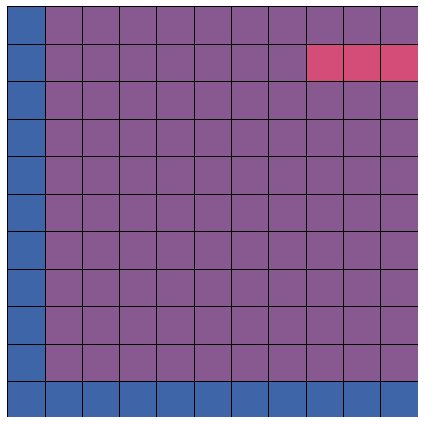

In [101]:
import seaborn as sns

grid_size = len(concentration_test)
heatmap_data = y_rate.reshape(grid_size, grid_size).T

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    heatmap_data,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette(["#D44C78","#3D65A8", "#885890"]),
    cbar=False,   # removes the colorbar
    vmin=0, vmax=2,
    linewidths=0.5,
    linecolor='black'
)
ax.set_ylim(0.05, grid_size) 
# Remove axes completely
ax.axis('off')

plt.tight_layout()
plt.savefig(
    "dispense_0_02_heatmap_only.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [102]:
concentration_test=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
dispense_rate_test=0.5
parameter_pool_test=[]
for i in range(len(concentration_test)):
    for j in range(len(concentration_test)):
        
        parameter=[concentration[i],concentration[j],dispense_rate_test]
        parameter_pool_test.append(parameter)
parameter_pool_test=np.array(parameter_pool_test) 
y_rate=RF_model.predict(parameter_pool_test)

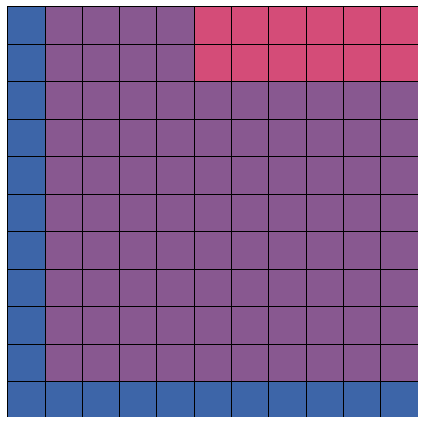

In [103]:


grid_size = len(concentration_test)
heatmap_data = y_rate.reshape(grid_size, grid_size).T

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    heatmap_data,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette(["#D44C78","#3D65A8", "#885890"]),
    cbar=False,   # removes the colorbar
    vmin=0, vmax=2,
    linewidths=0.5,
    linecolor='black'
)
ax.set_ylim(0.05, grid_size) 
# Remove axes completely
ax.axis('off')

plt.tight_layout()
plt.savefig(
    "dispense_0_5_heatmap_only.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [104]:
concentration_test=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
dispense_rate_test=1
parameter_pool_test=[]
for i in range(len(concentration_test)):
    for j in range(len(concentration_test)):
        
        parameter=[concentration[i],concentration[j],dispense_rate_test]
        parameter_pool_test.append(parameter)
parameter_pool_test=np.array(parameter_pool_test) 
y_rate=RF_model.predict(parameter_pool_test)

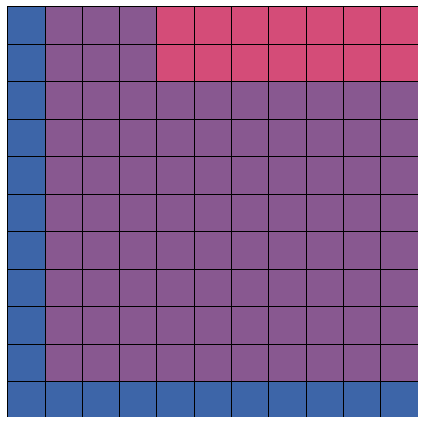

In [105]:


grid_size = len(concentration_test)
heatmap_data = y_rate.reshape(grid_size, grid_size).T

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    heatmap_data,
    xticklabels=False,
    yticklabels=False,
    cmap=sns.color_palette(["#D44C78","#3D65A8", "#885890"]),
    cbar=False,   # removes the colorbar
    vmin=0, vmax=2,
    linewidths=0.5,
    linecolor='black'
)
ax.set_ylim(0.05, grid_size) 
# Remove axes completely
ax.axis('off')

plt.tight_layout()
plt.savefig(
    "dispense_1_heatmap_only.png",
    dpi=300,
    bbox_inches='tight'
)
plt.show()